In [41]:
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn


df_credit = pd.read_csv("german_credit_data.csv")
df_credit.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [43]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [45]:
df_credit.nunique()

Unnamed: 0          1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving accounts        4
Checking account       3
Credit amount        921
Duration              33
Purpose                8
dtype: int64

In [47]:
df_credit.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [49]:
df_credit[['Saving accounts', 'Checking account']] = df_credit[['Saving accounts', 'Checking account']].fillna('unknown')


In [51]:
df_credit.isnull().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

In [53]:
df_credit['Credit amount'] = pd.to_numeric(df_credit['Credit amount'])

In [55]:
print(df_credit['Credit amount'].dtype)  # Should be numeric (e.g., int64 or float64)
print(df_credit['Credit amount'].unique())  # Check unique values for unexpected data


int64
[ 1169  5951  2096  7882  4870  9055  2835  6948  3059  5234  1295  4308
  1567  1199  1403  1282  2424  8072 12579  3430  2134  2647  2241  1804
  2069  1374   426   409  2415  6836  1913  4020  5866  1264  1474  4746
  6110  2100  1225   458  2333  1158  6204  6187  6143  1393  2299  1352
  7228  2073  5965  1262  3378  2225   783  6468  9566  1961  6229  1391
  1537  1953 14421  3181  5190  2171  1007  1819  2394  8133   730  1164
  5954  1977  1526  3965  4771  9436  3832  5943  1213  1568  1755  2315
  1412 12612  2249  1108   618  1409   797  3617  1318 15945  2012  2622
  2337  7057  1469  2323   932  1919  2445 11938  6458  6078  7721  1410
  1449   392  6260  7855  1680  3578  7174  2132  4281  2366  1835  3868
  1768   781  1924  2121   701   639  1860  3499  8487  6887  2708  1984
 10144  1240  8613   766  2728  1881   709  4795  3416  2462  2288  3566
   860   682  5371  1582  1346  5848  7758  6967  1288   339  3512  1898
  2872  1055  7308   909  2978  1131  1577  3

In [59]:
import numpy as np
import pandas as pd

# Calculate the median of the 'Credit amount' column
median_value = df_credit['Credit amount'].median()

# Add a new column 'Risk'
df_credit['Risk'] = np.where(df_credit['Credit amount'] < median_value, 'good', 'bad')

# Display the DataFrame
df_credit.head()



,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,unknown,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,unknown,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,bad
4,4,53,male,2,free,little,little,4870,24,car,bad


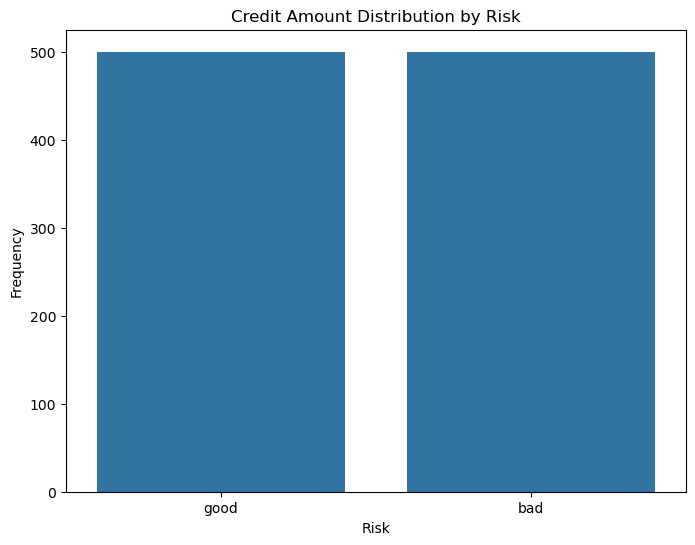

In [109]:
plt.figure(figsize=(8,6))
sns.countplot(data=df_credit,x='Risk')
plt.title('Credit Amount Distribution by Risk')
plt.xlabel('Risk')
plt.ylabel('Frequency')
plt.show()

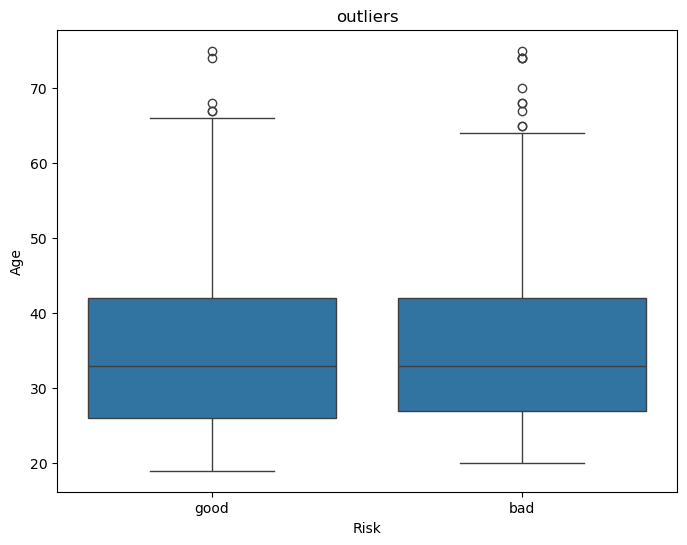

In [111]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Risk',y='Age',data=df_credit)
plt.title('outliers')
plt.show()

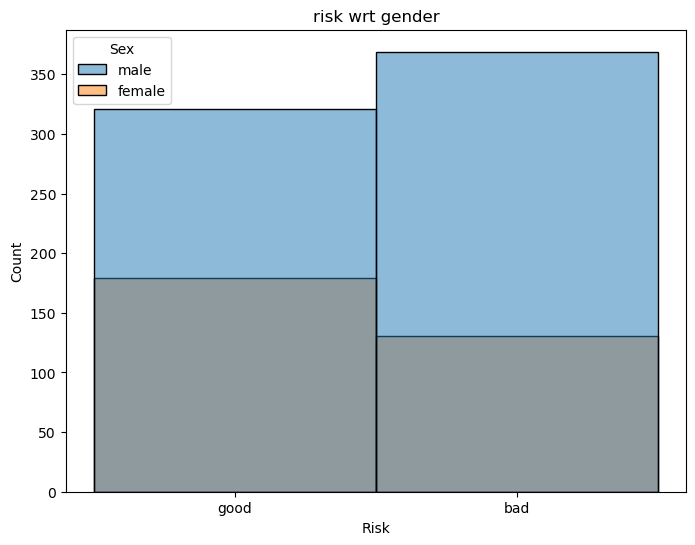

In [115]:
plt.figure(figsize=(8,6))
sns.histplot(x='Risk',hue='Sex',data=df_credit)
plt.title('risk wrt gender')
plt.show()

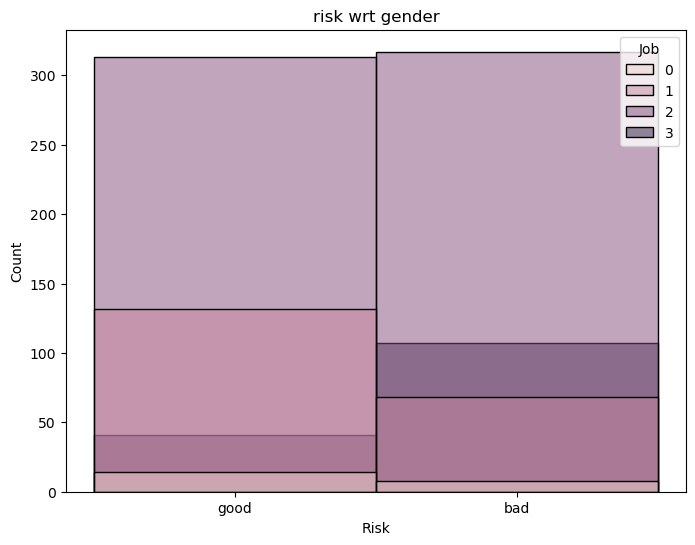

In [117]:
plt.figure(figsize=(8,6))
sns.histplot(x='Risk',hue='Job',data=df_credit)
plt.title('risk wrt gender')
plt.show()

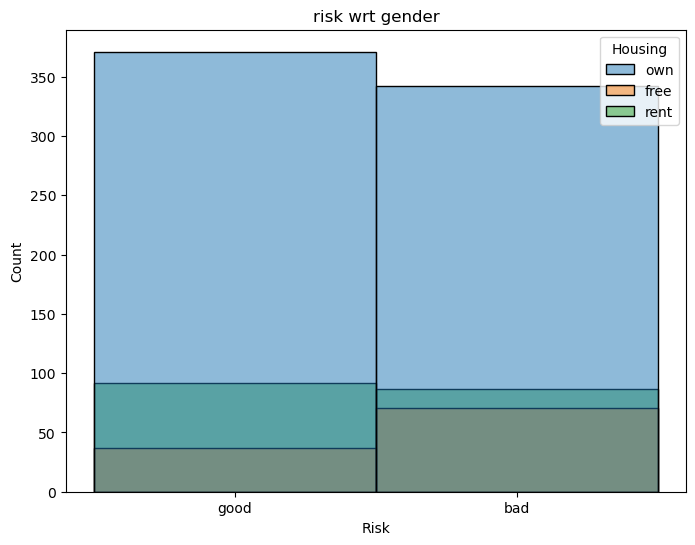

In [119]:
plt.figure(figsize=(8,6))
sns.histplot(x='Risk',hue='Housing',data=df_credit)
plt.title('risk wrt gender')
plt.show()

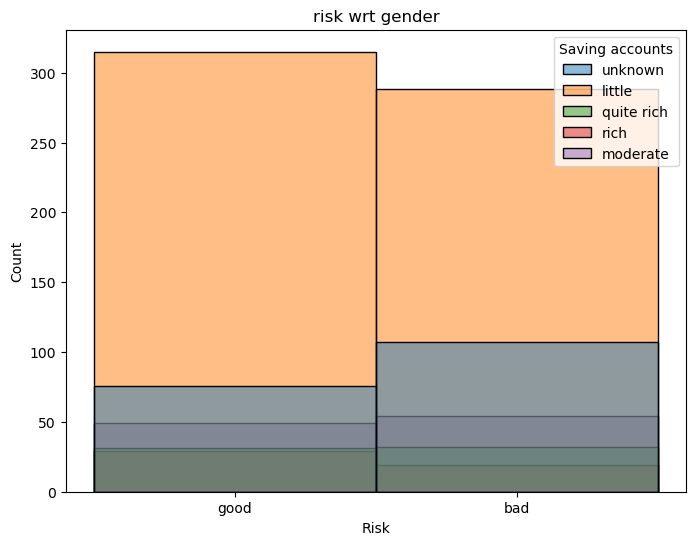

In [125]:
plt.figure(figsize=(8,6))
sns.histplot(x='Risk',hue='Saving accounts',data=df_credit)
plt.title('risk wrt gender')
plt.show()

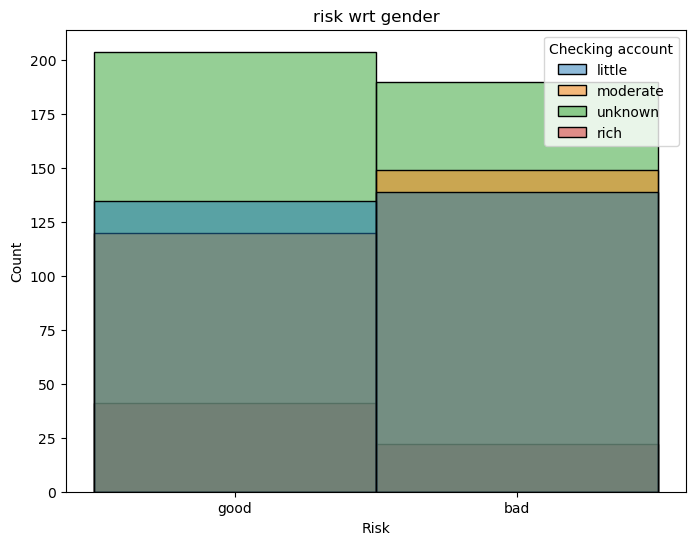

In [127]:
plt.figure(figsize=(8,6))
sns.histplot(x='Risk',hue='Checking account',data=df_credit)
plt.title('risk wrt gender')
plt.show()

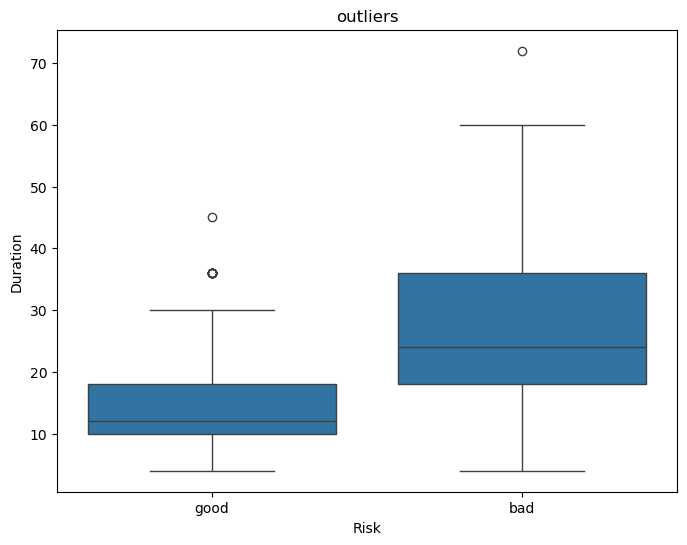

In [129]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Risk',y='Duration',data=df_credit)
plt.title('outliers')
plt.show()

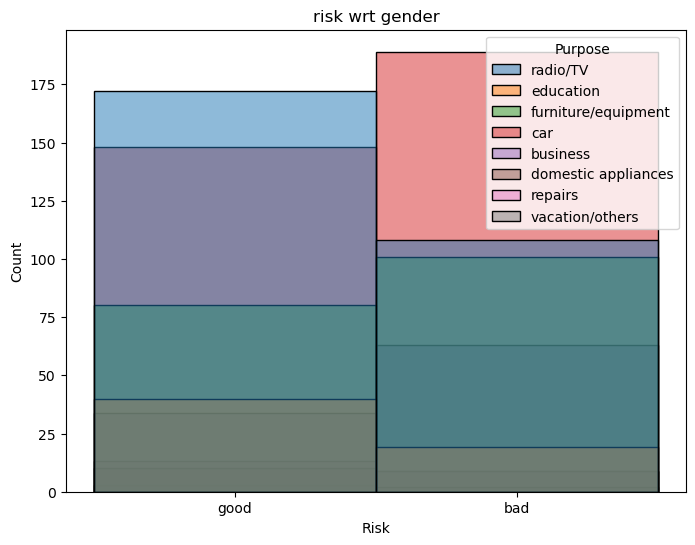

In [133]:
plt.figure(figsize=(8,6))
sns.histplot(x='Risk',hue='Purpose',data=df_credit)
plt.title('risk wrt gender')
plt.show()

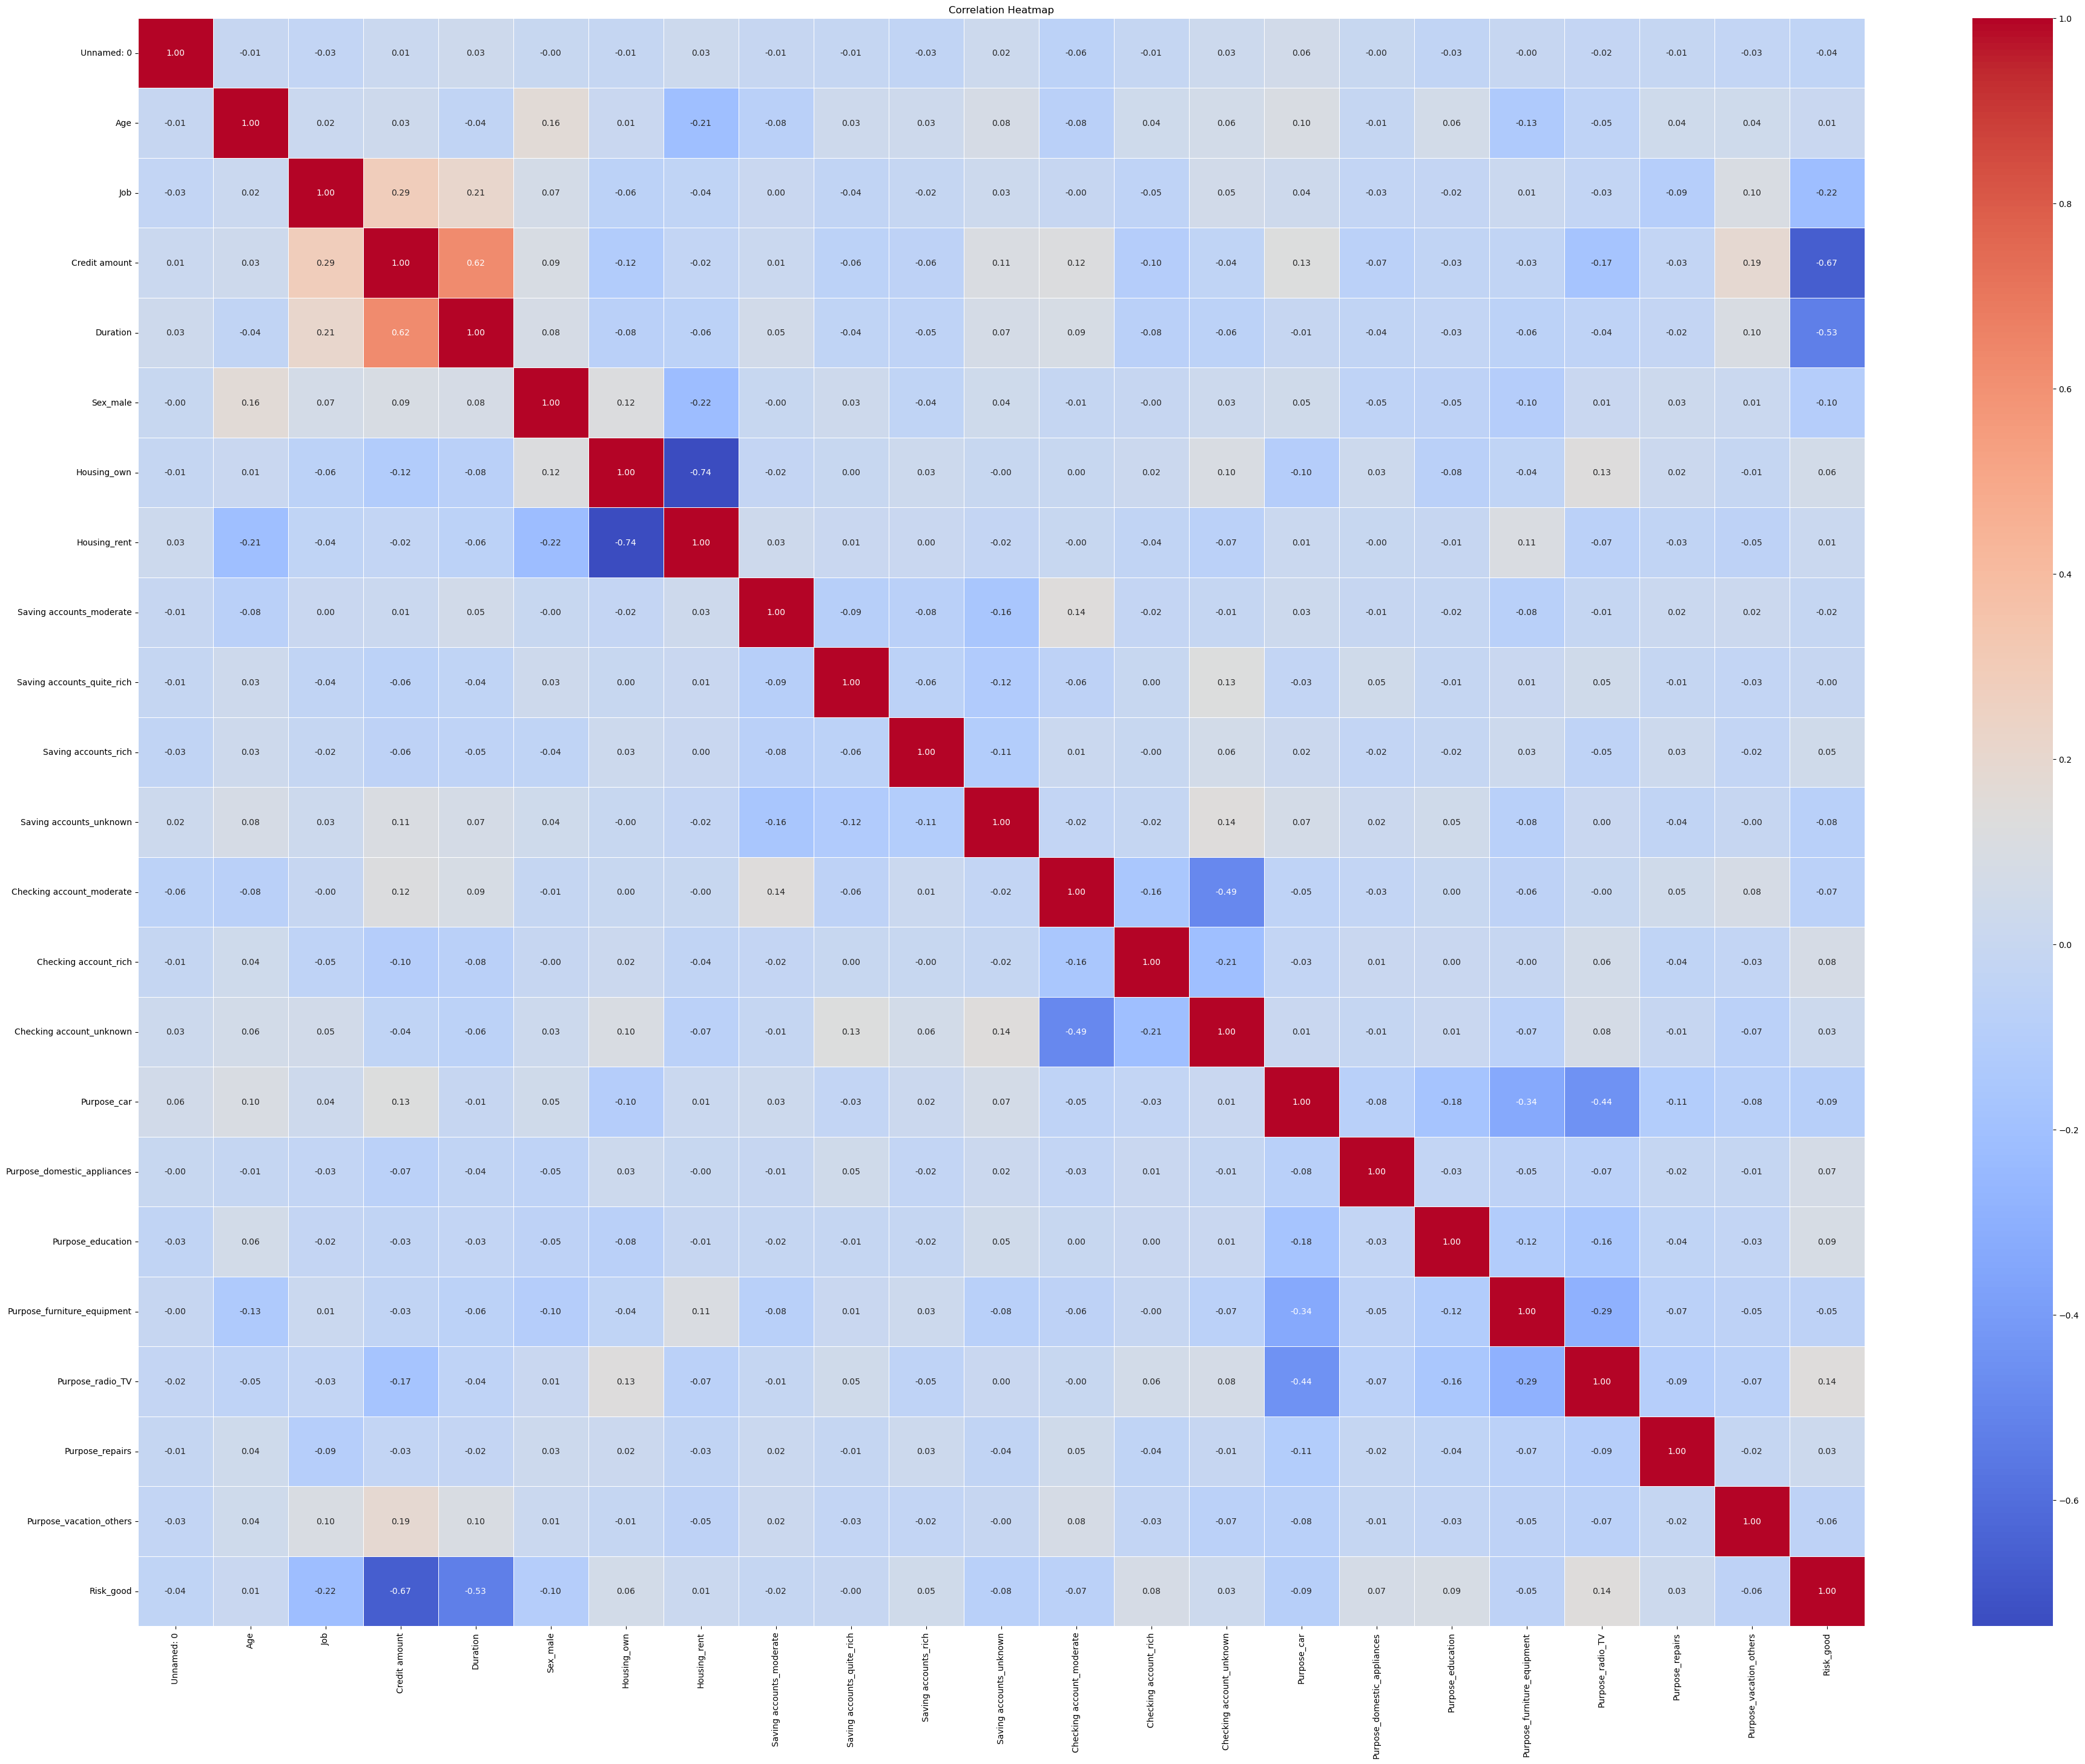

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the Pearson correlation matrix
corr = df_credit_dummy.corr(method='pearson')

# Dynamically set the figure size based on the correlation matrix shape
plt.figure(figsize=(corr.shape[1] * 2, corr.shape[1] * 1.5))  # Adjust the multipliers for your preference
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [139]:
import pandas as pd

# Assuming df_credit is your DataFrame
df_credit_2 = df_credit.copy()

# Replacing values in the 'Saving.accounts' column
df_credit_2['Saving accounts'] = df_credit_2['Saving accounts'].replace('quite rich', 'quite_rich')

# Replacing values in the 'Purpose' column
df_credit_2['Purpose'] = df_credit_2['Purpose'].replace('domestic appliances', 'domestic_appliances')
df_credit_2['Purpose'] = df_credit_2['Purpose'].replace('furniture/equipment', 'furniture_equipment')
df_credit_2['Purpose'] = df_credit_2['Purpose'].replace('radio/TV', 'radio_TV')
df_credit_2['Purpose'] = df_credit_2['Purpose'].replace('vacation/others', 'vacation_others')

# Display the modified dataframe
df_credit_2.head(10)


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,unknown,little,1169,6,radio_TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio_TV,bad
2,2,49,male,1,own,little,unknown,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture_equipment,bad
4,4,53,male,2,free,little,little,4870,24,car,bad
5,5,35,male,1,free,unknown,unknown,9055,36,education,bad
6,6,53,male,2,own,quite_rich,unknown,2835,24,furniture_equipment,bad
7,7,35,male,3,rent,little,moderate,6948,36,car,bad
8,8,61,male,1,own,rich,unknown,3059,12,radio_TV,bad
9,9,28,male,3,own,little,moderate,5234,30,car,bad


In [141]:
import pandas as pd

# Create dummy variables and remove the first dummy to avoid multicollinearity
df_credit_dummy = pd.get_dummies(df_credit_2, drop_first=True)

# Display the first few rows of the modified dataframe
df_credit_dummy.head()


,Unnamed: 0,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite_rich,...,Checking account_rich,Checking account_unknown,Purpose_car,Purpose_domestic_appliances,Purpose_education,Purpose_furniture_equipment,Purpose_radio_TV,Purpose_repairs,Purpose_vacation_others,Risk_good
0,0,67,2,1169,6,True,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1,1,22,2,5951,48,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,2,49,1,2096,12,True,True,False,False,False,...,False,True,False,False,True,False,False,False,False,True
3,3,45,2,7882,42,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,4,53,2,4870,24,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [171]:
df_credit_dummy.shape

(1000, 23)

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the features and target
X = df_credit_dummy.drop('Risk_good', axis=1)  # Replace 'target_column' with your actual target column name
y = df_credit_dummy['Risk_good']  # Replace 'target_column' with your actual target column name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the models
random_forest = RandomForestClassifier(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the models
random_forest.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest.predict(X_test)
y_pred_dt = decision_tree.predict(X_test)

# Evaluate the models
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))


Random Forest Accuracy: 0.9933333333333333
Decision Tree Accuracy: 0.9933333333333333

Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.99      1.00      0.99       145
        True       1.00      0.99      0.99       155

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300


Decision Tree Classification Report:
              precision    recall  f1-score   support

       False       0.99      1.00      0.99       145
        True       1.00      0.99      0.99       155

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

